In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install --no-cache-dir transformers pandas matplotlib wordcloud -q

In [ ]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from transformers import pipeline

In [ ]:
# Load data with proper encoding
df = pd.read_csv('/content/BA_reviews.csv')
reviews = df['reviews'].dropna().str[:512].tolist()[:1000]

In [ ]:
df.head()

,Unnamed: 0,reviews
0,0,✅ Trip Verified | I booked through BA becaus...
1,1,✅ Trip Verified | British airways lost bags ...
2,2,✅ Trip Verified | The check in process and rew...
3,3,"✅ Trip Verified | We flew in November 2023, ..."
4,4,✅ Trip Verified | I left for London from Johan...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   reviews     1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
# Text Preprocessing
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', str(text))  # Remove special characters
    text = re.sub(r'\b\w{1,2}\b', '', text)       # Remove short words
    return text.strip()[:256]                     # Limit to 256 characters

cleaned_reviews = [clean_text(r) for r in reviews]

In [ ]:
import torch

In [ ]:
# Optimized Aspect Analysis
aspect_pipeline = pipeline(
    "zero-shot-classification",
    model="valhalla/distilbart-mnli-12-3",
    device=0 if torch.cuda.is_available() else -1,
    batch_size=8  # Process 8 reviews at once
)

aspect_categories = [
    "baggage issues",
    "flight delays",
    "customer service",
    "seat comfort",
    "food quality",
    "staff attitude",
    "booking problems",
    "lounge experience"
]

# Batch processing with progress tracking
aspect_results = []
for i in range(0, len(cleaned_reviews), 8):
    batch = cleaned_reviews[i:i+8]
    aspect_results += aspect_pipeline(batch, aspect_categories, multi_label=True)
    print(f'Processed {min(i+8, len(cleaned_reviews))}/{len(cleaned_reviews)} reviews')

config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.02G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.02G [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

Device set to use cpu


Processed 8/1000 reviews
Processed 16/1000 reviews
Processed 24/1000 reviews
Processed 32/1000 reviews
Processed 40/1000 reviews
Processed 48/1000 reviews
Processed 56/1000 reviews
Processed 64/1000 reviews
Processed 72/1000 reviews
Processed 80/1000 reviews
Processed 88/1000 reviews
Processed 96/1000 reviews
Processed 104/1000 reviews
Processed 112/1000 reviews
Processed 120/1000 reviews
Processed 128/1000 reviews
Processed 136/1000 reviews
Processed 144/1000 reviews
Processed 152/1000 reviews
Processed 160/1000 reviews
Processed 168/1000 reviews
Processed 176/1000 reviews
Processed 184/1000 reviews
Processed 192/1000 reviews
Processed 200/1000 reviews
Processed 208/1000 reviews
Processed 216/1000 reviews
Processed 224/1000 reviews
Processed 232/1000 reviews
Processed 240/1000 reviews
Processed 248/1000 reviews
Processed 256/1000 reviews
Processed 264/1000 reviews
Processed 272/1000 reviews
Processed 280/1000 reviews
Processed 288/1000 reviews
Processed 296/1000 reviews
Processed 304/

In [ ]:
# Fast Sentiment Analysis
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="cardiffnlp/twitter-roberta-base-sentiment-latest",
    device=0 if torch.cuda.is_available() else -1,
    truncation=True,
    padding=True,
    batch_size=16  # Process 16 reviews at once
)

# Process sentiment in batches
sentiment_results = []
for i in range(0, len(cleaned_reviews), 16):
    batch = cleaned_reviews[i:i+16]
    sentiment_results += sentiment_pipeline(batch)
    print(f'Analyzed {min(i+16, len(cleaned_reviews))}/{len(cleaned_reviews)} sentiments')


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/501M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cpu
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Analyzed 16/1000 sentiments
Analyzed 32/1000 sentiments
Analyzed 48/1000 sentiments
Analyzed 64/1000 sentiments
Analyzed 80/1000 sentiments
Analyzed 96/1000 sentiments
Analyzed 112/1000 sentiments
Analyzed 128/1000 sentiments
Analyzed 144/1000 sentiments
Analyzed 160/1000 sentiments
Analyzed 176/1000 sentiments
Analyzed 192/1000 sentiments
Analyzed 208/1000 sentiments
Analyzed 224/1000 sentiments
Analyzed 240/1000 sentiments
Analyzed 256/1000 sentiments
Analyzed 272/1000 sentiments
Analyzed 288/1000 sentiments
Analyzed 304/1000 sentiments
Analyzed 320/1000 sentiments
Analyzed 336/1000 sentiments
Analyzed 352/1000 sentiments
Analyzed 368/1000 sentiments
Analyzed 384/1000 sentiments
Analyzed 400/1000 sentiments
Analyzed 416/1000 sentiments
Analyzed 432/1000 sentiments
Analyzed 448/1000 sentiments
Analyzed 464/1000 sentiments
Analyzed 480/1000 sentiments
Analyzed 496/1000 sentiments
Analyzed 512/1000 sentiments
Analyzed 528/1000 sentiments
Analyzed 544/1000 sentiments
Analyzed 560/1000 se

In [ ]:
# Combine Results
analysis_data = []
for idx, (review, aspect, sentiment) in enumerate(zip(cleaned_reviews, aspect_results, sentiment_results)):
    analysis_data.append({
        "review": review,
        "aspects": aspect['labels'][:3],  # Top 3 aspects
        "scores": aspect['scores'][:3],
        "sentiment": sentiment['label'],
        "sentiment_score": sentiment['score']
    })

analysis_df = pd.DataFrame(analysis_data)


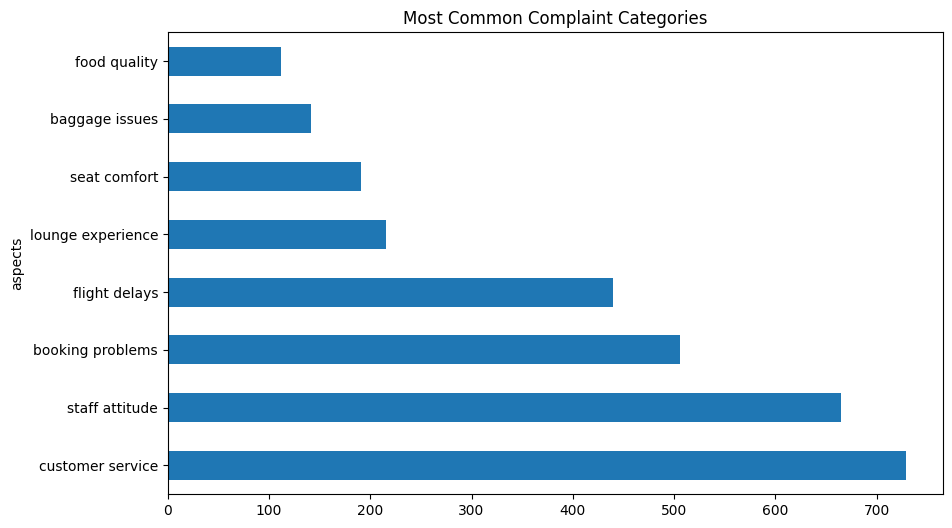

In [ ]:
# Visualizations
# Aspect frequency plot
plt.figure(figsize=(10,6))
analysis_df['aspects'].explode().value_counts().plot(kind='barh')
plt.title('Most Common Complaint Categories')
plt.savefig('aspects.png', bbox_inches='tight')
plt.show()

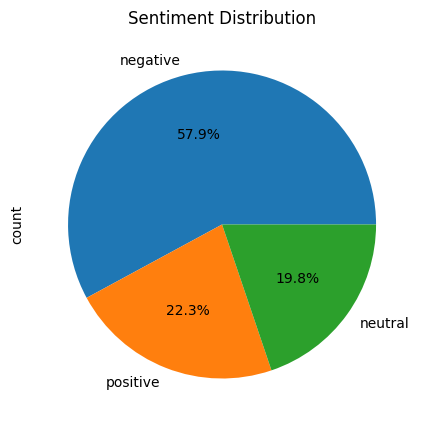

In [ ]:
# Sentiment distribution
plt.figure(figsize=(8,5))
analysis_df['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.savefig('sentiment.png', bbox_inches='tight')
plt.show()


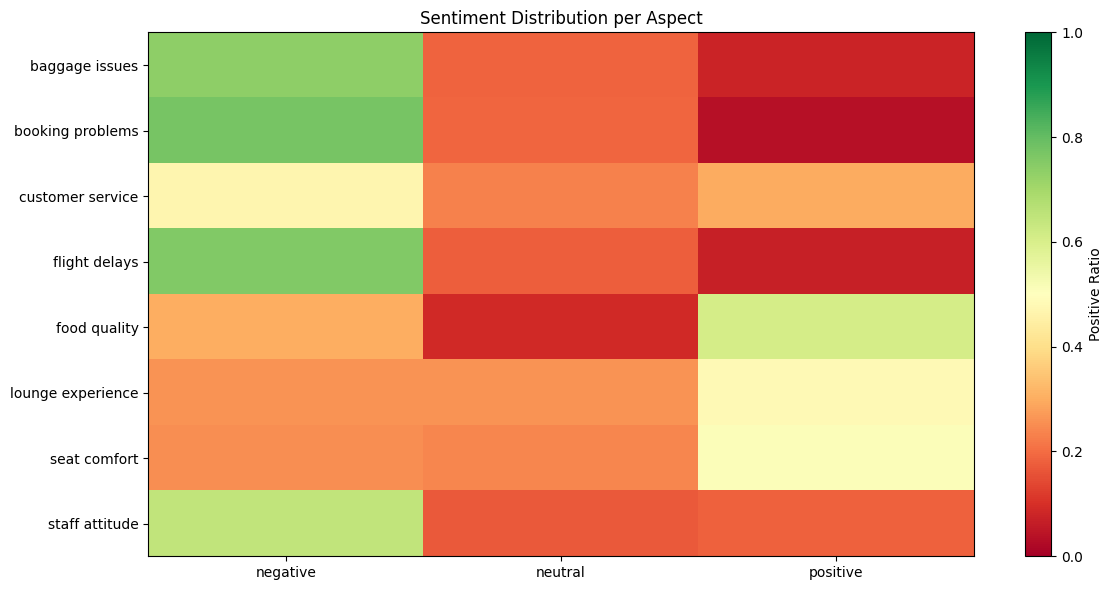

In [ ]:
#  Heatmap
aspect_sentiment = (
    analysis_df.explode('aspects')
    .groupby(['aspects', 'sentiment'])
    .size()
    .unstack(fill_value=0)
    .apply(lambda x: x/x.sum(), axis=1)
)

plt.figure(figsize=(12,6))
plt.imshow(aspect_sentiment, cmap='RdYlGn', aspect='auto', vmin=0, vmax=1)
plt.colorbar(label='Positive Ratio')
plt.xticks(range(len(aspect_sentiment.columns)), aspect_sentiment.columns)
plt.yticks(range(len(aspect_sentiment.index)), aspect_sentiment.index)
plt.title('Sentiment Distribution per Aspect')
plt.tight_layout()
plt.savefig('heatmap.png', bbox_inches='tight')
plt.show()


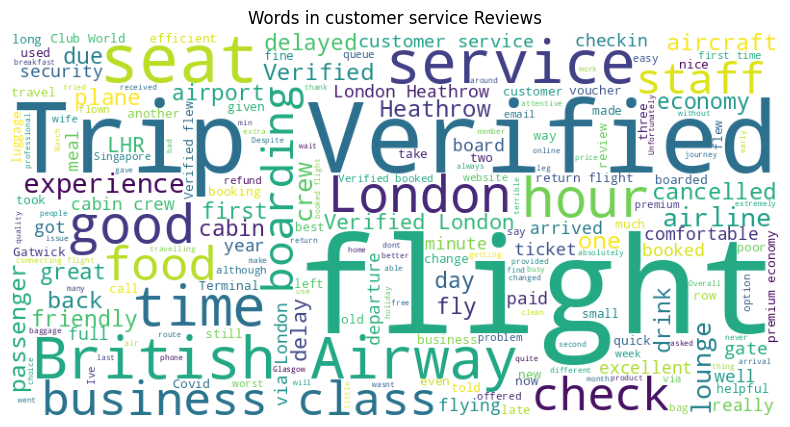

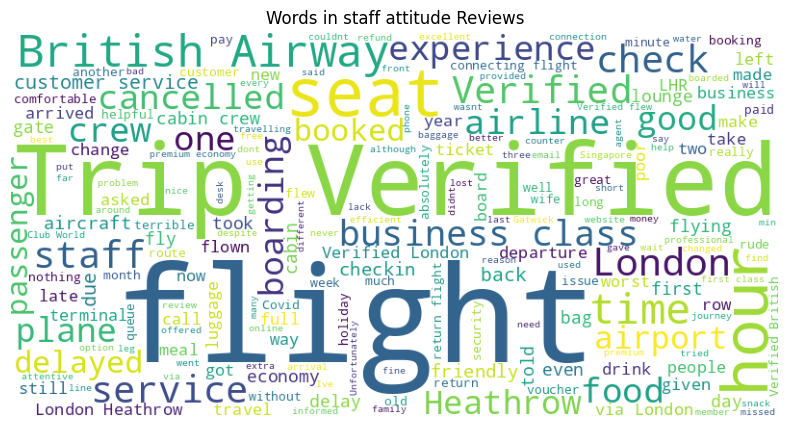

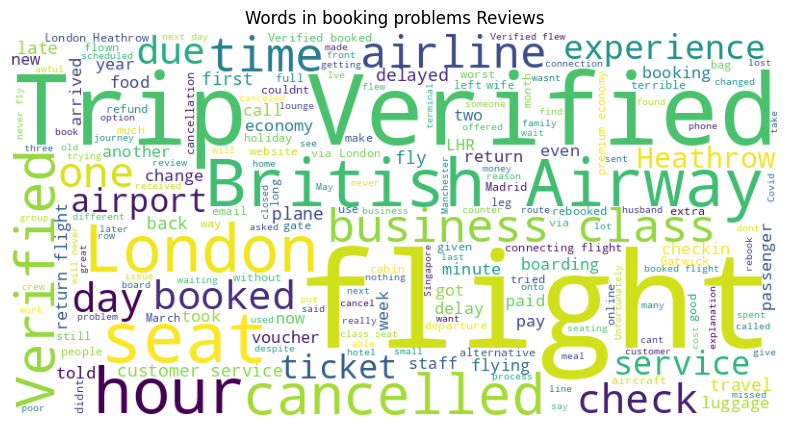

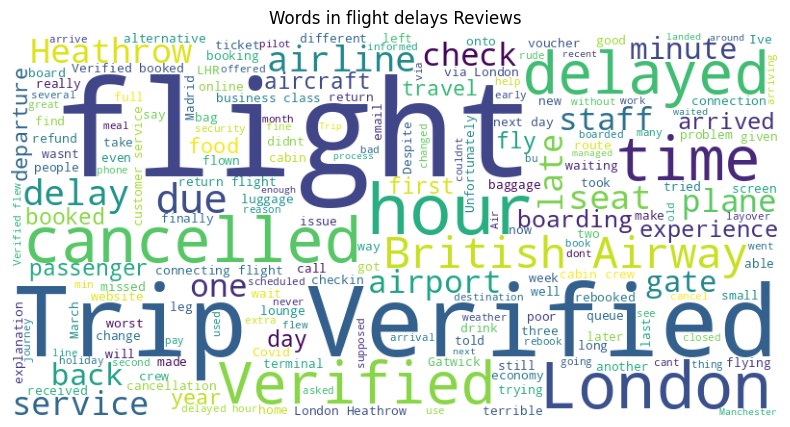

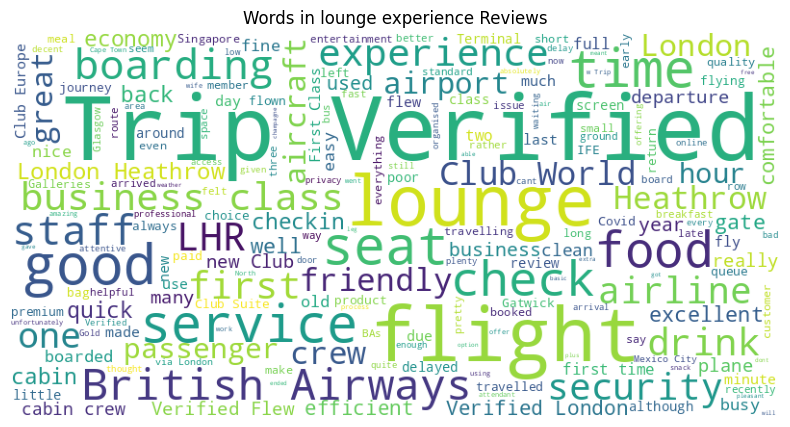

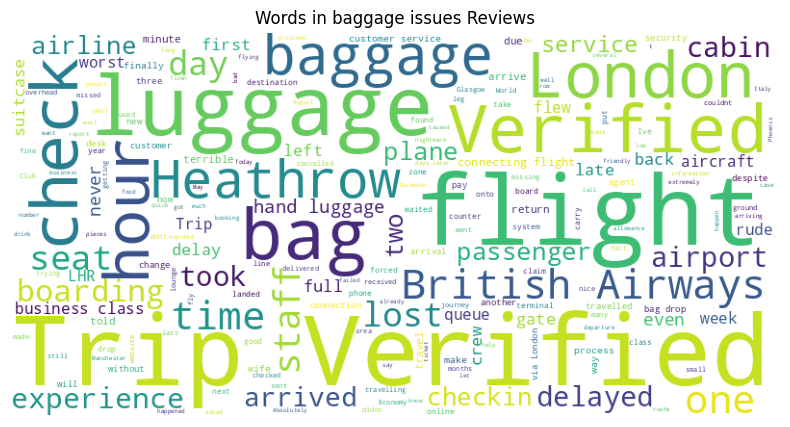

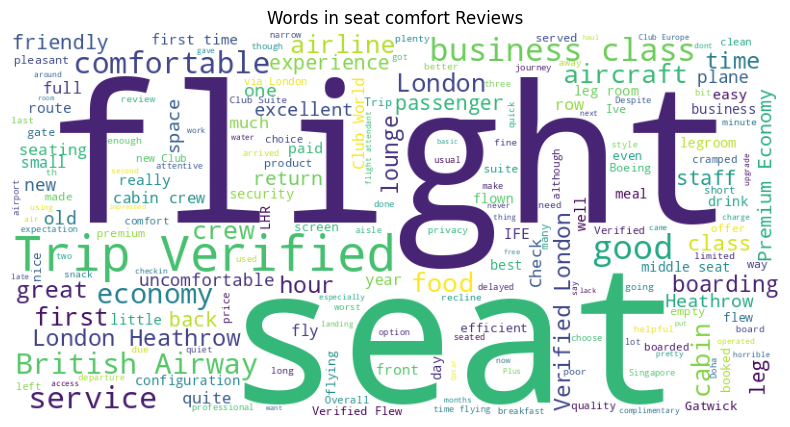

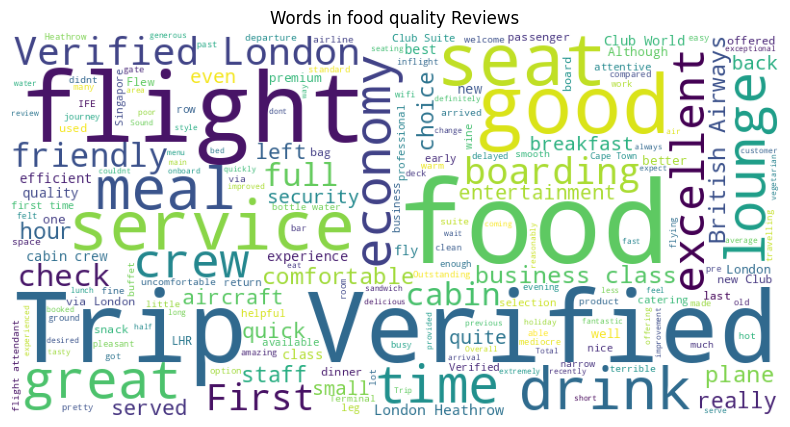

In [26]:
# Generate Word Clouds
def create_wordcloud(aspect):
    texts = ' '.join([r['review'] for _, r in analysis_df.iterrows() if aspect in r['aspects']])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texts)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud)
    plt.title(f'Words in {aspect} Reviews')
    plt.axis('off')
    plt.savefig(f'{aspect}.png', bbox_inches='tight')
    plt.show()

create_wordcloud('customer service')
create_wordcloud('staff attitude')
create_wordcloud('booking problems')
create_wordcloud('flight delays')
create_wordcloud('lounge experience')
create_wordcloud('baggage issues')
create_wordcloud('seat comfort')
create_wordcloud('food quality')





In [ ]:
# Save Results
analysis_df.to_csv('analysis_results.csv', index=False)